In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
batch_size = 32
img_height=128
img_width=128



In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory('D:/gesture/train',validation_split = 0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory('D:/gesture/train',validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

class_names = train_ds.class_names
print("Class name: ", class_names)
print("Total classes: ", len(class_names))


Found 73231 files belonging to 26 classes.
Using 58585 files for training.
Found 73231 files belonging to 26 classes.
Using 14646 files for validation.
Class name:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Total classes:  26


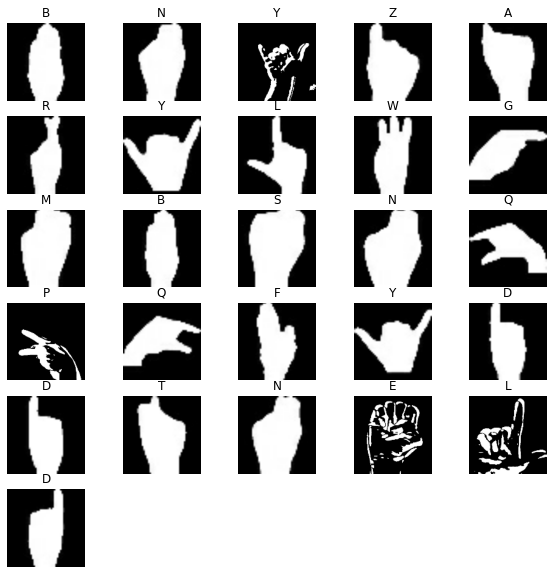

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    layers.Rescaling(1./255,input_shape=(128,128,3)),
    layers.Conv2D(16, 3, activation='relu'), #padding ≠ same, as output value size ≠ input volume size
    layers.MaxPooling2D(), #downsampled

    layers.Conv2D(32, 3, activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

#model.add(Dropout(0.2))
    layers.Dense(128,activation ="relu"),
#model.add(Dropout(0.3))
    layers.Dense(26,activation ="softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        1

In [5]:

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=test_ds,epochs=3)

Epoch 1/3
1831/1831 [==============================] - 308s 168ms/step - loss: 0.0510 - accuracy: 0.9860 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 2/3
1831/1831 [==============================] - 274s 150ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 4.3950e-04 - val_accuracy: 0.9999
Epoch 3/3
1831/1831 [==============================] - 258s 141ms/step - loss: 4.3822e-06 - accuracy: 1.0000 - val_loss: 4.9518e-04 - val_accuracy: 0.9999


In [6]:
model.save('ASL_train3')

INFO:tensorflow:Assets written to: ASL_train3\assets
